# Statistics_python

# Chapter 3. 파이썬을 이용한 데이터 분석

## 3.6 정규분포와 응용

* 정규분포를 할용하면 시뮬레이션을 하지 않고 계산만으로도 다양한 것을 알 수 있다.

* 확률밀도함수를 이용하는 방법과 파이썬으로 구현하는 방법, 정규분포에서 얻을 수 있는 표본분포로 t분포를 도입

### 3.6.1 라이브러리 임포트

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 3.6.2 확률밀도

* 정규분포의 확률밀도 함수 만들기

In [2]:
np.pi

3.142

In [3]:
np.exp(1)

2.718

* 평균 4, 분산 0.64(표준편차 0.8)인 정규분포에 대해 확률변수가 3일때의 확률밀도 확인

In [4]:
x = 3
mu = 4
sigma = 0.8 

1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu) ** 2)/(2*sigma**2))

0.228

* scipy.stats 내장 함수를 이용해 위 계산을 간단하게 할 수 있음

In [5]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.228

* 평균 4, 표준편차 0.8인 정규분포의 인스턴스를 생성해서 pdf 함수를 호출해도 동일한 결과를 얻을 수 있음

In [6]:
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

0.228

* 확률밀도의 시각화

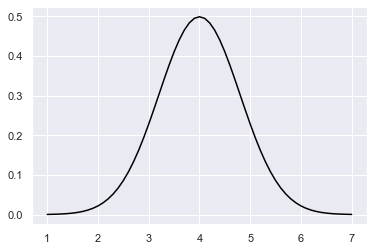

In [7]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(x_plot, stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8), color = 'black')

### 3.6.3 표본이 어떤 값 이하가 되는 비율

* 어떤 값 이하가 되는 데이터의 개수 / 샘플 사이즈 계산을 통해 도출 가능

In [8]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [9]:
len(simulated_sample)

100000

In [10]:
np.sum(simulated_sample < 3)

10371

In [11]:
np.sum(simulated_sample < 3) / len(simulated_sample)

0.104

### 3.6.4 누적분포함수

* 확률변수 X에 대해 x가 실수라고 했을 때 다음과 같이 되는 $F(X)$를 **누적분포함수 또는 분포함수(cdf: cumulative distribution function)** 라고 한다.

    $$F(x) = P(X \le x )$$

In [12]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.106

In [13]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.500

In [14]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 7)

1.000

### 3.6.5 하측확률과 퍼센트포인트

* **하측확률(low probability)** 데이터가 어떤 값 이하가 될 확률

* **퍼센트포인트(percent point)** : 반대로 어떤 확률이 될 기준치 (quantile) -> ppf(percent point function) 이용하여 계산

In [15]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.432

* 하측확률과 퍼센트 포인트 관계

In [16]:
lower = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = lower)

3.000

* 하측확률이 50%가 되는 퍼센트포인트는 평균과 일치함

In [17]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.000

### 3.6.6. 표준정규분포

* 평균 0, 분산(표준편차) 1인 정규분포

* 파이썬의 퍼센트포인트 함수를 이용하면 과거 표준정규분포표는 사용하지 않아도 됨

### 3.6.7 t값

* t값은 다음과 같이 계산되는 통계량

$ t = \frac{ \hat{\mu} - \mu}{\frac{\hat{\sigma} } {\sqrt{N}}} $

* 자연어로 다시 쓰면 t값 = (표본평균 - 모평균)/표준오차

* 즉, 표본평균에 대한 표준화로 볼 수 있음

    * 표준오차 = 표본평균의 표준편차

### 3.6.8 t값의 표본분포

* 모집단분포가 정규분포임을 가정했을 때 표본분포를 구하는 것도 이론적으로 가능함

* 다음 시뮬레이션 실시 

    - 1. 모집단 분포가 $N(x | 4, 0.8^2)$인 모집단에서 표본추출 시뮬레이션을 실시. 이때 샘플사이즈는 10
    
    - 2. 얻은 표본에서 표본평균을 구함
    
    - 3. 얻은 표본에서 표준오차를 구함(표준오차는 표본평균의 표준오차로 간주)
    
    - 4. (표본평균 - 모평균) / 표준오차 계산으로 t값을 계산함    

In [18]:
np.random.seed(1)

t_value_array = np.zeros(10000)

norm_dist = stats.norm(loc = 4, scale = 0.8)

# 시뮬레이션 실시

for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof = 1)
    sample_se = sample_std/np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


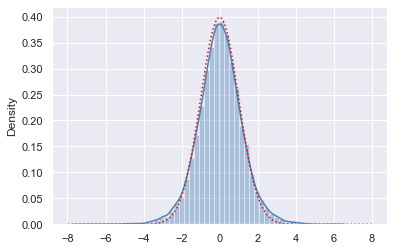

In [19]:
## distplot 이용 

# t값의 히스토그램
sns.distplot(t_value_array, color = "steelblue")

# 표준정규분포의 확률밀도
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), color = "red", linestyle = "dotted")

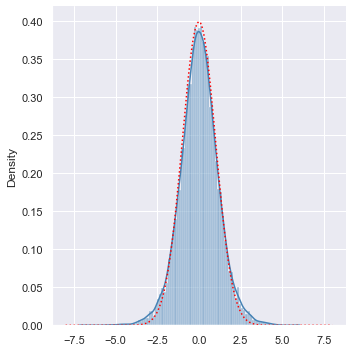

In [20]:
## displot 이용 

# t값의 히스토그램
sns.displot(t_value_array, color = "steelblue", stat="density", kde = True)
# 표준정규분포의 확률밀도
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), color = "red", linestyle = "dotted")

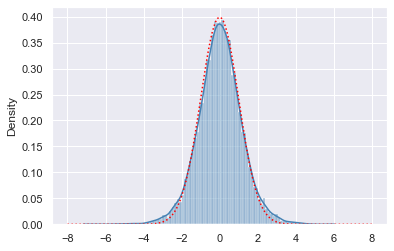

In [21]:
## histplot 이용 

# t값의 히스토그램
sns.histplot(t_value_array, color = "steelblue",  stat="density", kde = True)
# 표준정규분포의 확률밀도
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), color = "red", linestyle = "dotted")

* distplot은 비권장 함수로 향후 소거될 대상이므로 displot과 histplot으로 동일한 그림을 나타내어 봄

* 불편성을 만족하므로 표본평균의 평균값은 모평균을 따름

* 하지만 표준오차로 나누었는데도 분포의 밑단이 넓어짐. (표본에서 계산한 표준오차로 나누면서 분산이 1보다 크기 때문임)

### 3.6.9 t분포

* 모집단분포가 정규분포일때 t값의 표본분포를 **t분포**라고 함

* t 분포의 형태는 자유도에 따라 달라짐. 자류도가 n일 경우 t분포는 t(n)으로 표기함

* t 분포의 평균값은 0, t분포의 분산은 1보다 조금 큼. 자유도를 n으로 했을 때 아래와 같이 계산(n이 2보다 클때)

    $$ t(n)의 분산 = \frac{n}{n-2}$$
    
    
* 자유도(즉, 샘플사이즈)가 커질수록 분산은 1에 가까워지고 표준정규분포와 거의 차이가 나지 않게됨(반대로 말하면 샘플사이즈가 작아질 경우 차이가 커짐)

* 점선은 표준정규분포를 나타내며 굵은선은 t분포를 나타낸다.

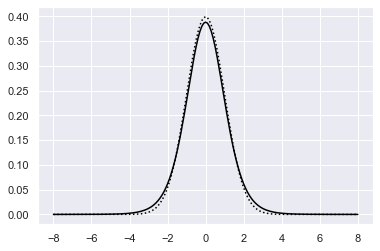

In [22]:
# 표준정규분포
plt.plot(x, stats.norm.pdf(x = x), color = 'black', linestyle = 'dotted')
# t분포
plt.plot(x, stats.t.pdf(x = x, df = 9), color = 'black')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


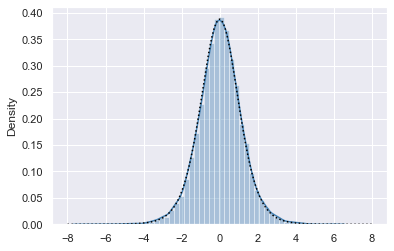

In [23]:
sns.distplot(t_value_array, color = "steelblue", norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), color = "black", linestyle = "dotted")

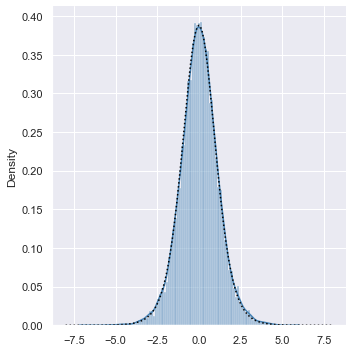

In [24]:
sns.displot(t_value_array, color = "steelblue", stat="density", kde = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), color = "black", linestyle = "dotted")

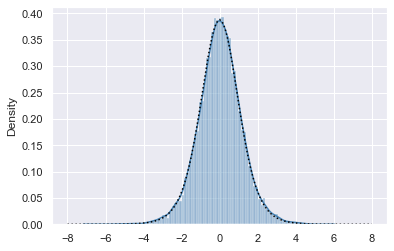

In [25]:
sns.histplot(t_value_array, color = "steelblue", stat="density", kde = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), color = "black", linestyle = "dotted")

**(t분포의 의미)**

* t분포의 의미를 한마디로 표현하자면 **모분산을 모르는 상황에서도 표본평균의 분포에 대해 얘기할 수 있다는 것**

* 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있음. 이러한 내용은 구간추정 등을 할 때 활용됨

## 3.7 추정

* 모집단분포가 정규분포임을 가정했을 때 모수를 알면 모집단 분포를 추정할 수 있다. 

### 3.7.1 분석 준비

In [26]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [27]:
fish = pd.read_csv("./py_source/3-7-1-fish_length.csv")["length"]

In [28]:
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

### 3.7.2 점추정

**점추정** : 모수(모집단분포의 파라미터)를 어느 1개의 값으로 추정하는 방법

* 모평균을 추정하는 경우엔 표본평균을 추정값으로 사용
    
* 결국 우리가 하는 것은 표본에서 평균값을 계산
    
* 표본평균을 사용해도 좋은 이유는 표본평균은 불편성과 일치성을 가지고 있는 통계량이므로 모평균의 추정값으로 표본평균을 사용

In [29]:
mu = np.mean(fish)

In [30]:
mu

4.187

* 표본평균이 4.187이므로 모평균도 4.187이라고 추정함.(이것이 점추정)

* 모분산의 점추정값으로는 불편분산을 사용함

In [31]:
sigma_2 = np.var(fish, ddof = 1)

In [32]:
sigma_2 

0.680

### 3.7.3 구간추정

* **구간추정** : 추정값이 폭을 가지게 하는 추정 방법. 추정값의 폭 계산에는 확률의 개념을 사용

    * 폭을 가지므로 추정오차를 가미할 수 있음. 추정오차가 작으면 구간 추정의 폭이 좁아짐
    
    * 샘플사이즈가 커져도 구간추정의 폭은 좁아짐

### 3.7.4 신뢰계수와 신뢰구간

* **신뢰계수** : 구간추정의 폭에 대한 신뢰 정도를 확률로 표현한 것.(예: 95%, 99% 등의 수치)

* **신뢰구간** : 특정 신뢰계수를 만족하는 구간

    * 신뢰계수가 클수록 신뢰구간의 폭이 넓어짐

### 3.7.5 신뢰한계

* **신뢰한계(confidence limit)** 는 신뢰구간의 상한값과 하한값. 

* 각각 하층신뢰한계(lower confidence limit), 상측신뢰한계(upper confidence limit)라고 함

### 3.7.6 신뢰구간 계싼 방법

* (표본평균 - 모평균)/표준오차 로 계산한 t 값은 t 분포를 따름

* 구간추정을 할 때는 t분포의 퍼센트포인트(어떤 확률이 되는 기준점)를 사용함

* 신뢰계수 95%라고 했을 때, t분포를 따른 다면 2.5% 지점과 97.5% 지점을 계산함 (t분포를 따를 변수가 이 구간에 들어갈 확률은 95%라는 이야기)

### 3.7.7 구간추정(실습)

In [33]:
# 자유도 

df = len(fish) - 1 
df

9

In [34]:
# 표준오차

sigma = np.std(fish, ddof = 1)
se = sigma / np.sqrt(len(fish))
se

0.261

In [35]:
# stats.t.interval 함수를 이용 신뢰 구간 계산

interval = stats.t.interval(alpha = 0.95, df = df, loc = mu, scale = se)
interval

(3.597, 4.777)

### 3.7.8 신뢰구간을 구하는 방법 상세 설명

* 1. 어떤 자류도를 가지는 t분포를 따라 97.5% 지점을 계산

    * 1.1 t분포를 따르는 97.5% 지점을 $t_{0.975}$로 표기

    * 1.2 t분포는 평균에 대해 좌우대칭이기 때문에 2.5% 지점은 $-t_{0.975}$로 표기

    * 1.3 t분포를 따르는 변수가 $-t_{0.975}$ 이상 $t_{0.975}$ 이하가 되는 확률이 95%임(이때 95%가 신뢰계수가 된다.)

* 2. 표본평균 $-t_{0.975}$ x 표준오차가 하측신뢰한계

* 3. 표본평균 $t_{0.975}$ x 표준오차가 상측신뢰한계

$$ t_{value} = \frac{ \hat{\mu} - \mu}{\hat{se}}$$ 이므로

$$ p \left( \hat{\mu} - t_{0.975} \times \hat{se} \le \mu \le \hat{\mu} + t_{0.975} \times \hat{se} \right) = 95 \% $$

In [36]:
t_975 = stats.t.ppf(q = 0.975, df = df)
t_975

2.262

In [37]:
lower = mu - t_975 * se
lower

3.597

In [38]:
upper = mu + t_975 * se
upper

4.777

### 3.7.9 신뢰구간의 폭을 결정하는 요소

* 표본의 분산 크기가 크면 '데이터가 평균값에서 흩어져 있다. -> 평균값을 신뢰할 수 없게 된다'가 되므로 신뢰구간의 폭이 넓어짐

* 반대로 샘플 사이즈가 커지면 표본평균을 신뢰할 수 있게 되므로 신뢰구간 좁아짐

In [39]:
# 표본표준편차 10배 증가
se2 = (sigma*10)/np.sqrt(len(fish))
stats.t.interval(alpha = 0.95, df = df, loc = mu, scale = se2)

(-1.713, 10.087)

In [40]:
# 샘플사이즈 10배 증가
df2 = (len(fish)*10) -1 
se3 = sigma / np.sqrt(len(fish)*10)
stats.t.interval(alpha = 0.95, df = df2, loc = mu, scale = se3)

(4.023, 4.351)

* 완전히 똑같은 데이터라고 해도 신뢰계수가 커질수록 안전해진다고 볼 수 있음

* 99% 신뢰구간은 아래와 같이 계산할 수 있음

In [41]:
stats.t.interval(alpha = 0.99, df = df, loc = mu, scale = se)

(3.339, 5.035)

### 3.7.10 구간추정 결과의 해석

**(중요)**

신뢰계수 95%의 의미

1. 원래 모집단분포에서 표본을 추출

2. 이번에도 같은 방법으로 95% 신뢰구간을 계산

3. 이러한 시행을 여러번 반복

4. 모든 시행 중 원래 모집단이 신뢰구간에 포함되는 비율이 95%

In [42]:
# 시뮬레이션 실시(시행횟수: 20,000번)

# 신뢰구간이 모평균(4)을 포함하면 True되는 변수를 담기 위한 어레이
be_included_array = np.zeros(20000, dtype = "bool") 

# 신뢰구간이 모평균(4)를 포함하면 True라 되어 준비한 어레이에 입력될 수 있도록 for문 작성

np.random.seed(1)
norm_dist = stats.norm(loc = 4, scale = 0.8)
for i in range(0, 20000):
    sample = norm_dist.rvs(size = 10)
    df = len(sample) - 1
    mu = np.mean(sample)
    std = np.std(sample, ddof = 1)
    se = std/np.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if(interval[0] <= 4 and interval[1] >= 4):
        be_included_array[i] = True


In [43]:
sum(be_included_array)/len(be_included_array)

0.948

* 신뢰구간이 모평균(4)를 포함한 비율이 대략 0.95에 해당함

## 3.8 통계적가설검정

### 3.8.1 통계적가설검정

**통계적 가설검정** : 표본을 사용해서 모집단에 관한 통계적 판단을 내리는 방법. 간단히 검정이라고도 함

### 3.8.2 1변량 데이터의 t검정

* 1변량 데이터에 대한 t검정의 특징

    - 대상: 평균값
    
    - 판단하는 것: 평균값이 어떤값과 다른지 얘기할 수 있는지 여부
    
* 평균에 대한 검정

### 3.8.3 유의미한 차이

* **유의미한 차이** : 의미가 있는 차이 / 의미가 없는 차이와 대비되어 사용

### 3.8.4 t검정: 직관적인 생각

* t검정의 유의미한 차이에 대한 3가지 조건 (예시 : 조건) 

    - 큰 샘플에서 조사했다 : 샘플사이즈가 크다
    
    - 정밀한 저울로 측정했다 : 데이터의 흩어짐(분산)이 적다.
    
    - 중량의 평균값이 OOg에서 크게 벗어난다 : 평균값의 차이가 크다.
    

### 3.8.5 평균값의 차이가 큰 것만으로는 유의미한 차이를 얻을 수 없다. 

- 샘플사이즈와 데이터의 흩어짐 크기가 가미되어야 함

### 3.8.6 t값

* t검정의 유의미한 차이에 대한 3가지 조건 (예시 : 조건) 

    - 큰 샘플에서 조사했다 : 샘플사이즈가 크다
    
    - 정밀한 저울로 측정했다 : 데이터의 흩어짐(분산)이 적다.
    
    - 중량의 평균값이 OOg에서 크게 벗어난다 : 평균값의 차이가 크다.
    
* 3가지 모두를 만족한 지표를 t값이라고 부르며, 아래와 같이 계산 가능함

    - t값 = (표본평균 - 비교대상값)/표준오차 
    
    - 이때 t값이 크면 비교대상값과 유의한 차이가 있다고 판단할 수 있음

### 3.8.7 통계적가설검정의 틀: 귀무가설, 대립가설

* 통계적가설검정에서 가설을 세워서 그 가설이 기각되는지 판단함으로써 데이터에 대한 객관적인 판단을 시도함

* 귀무가설 vs 대립가설

* 예) 과자 봉지의 평균값이 50g이라는 것을 판단하려는 경우 아래와 같이 가설을 세워 검정함

    - 귀무가설: 봉지과자의 평균중량이 50g이다.
    
    - 대립가설: 봉지과자의 평균중량이 50g이 아니다.

### 3.8.8 p-value

* **p-value** 란 표본과 귀무가설 간의 모순을 나타내는 지표

* p-값이 작을수록 귀무가설과 표본이 모순된다고 생각할 수 있음

* p값은 확률로 표현됨. p값과 신뢰구간 둘 다 완전히 같은 조건에서 몇 번이고 표본추출을 하고 t값 계산을 반복해서 구한 확율을 해석한다는 점에서 주의(3.11절에서 추가 설명)

### 3.8.9 유의수준(significance level)

* p-값이 유의수준을 밑돌면 귀무가설을 기각함. 따라서 **유의수준** 귀무가설을 기각하는 기준이 되는 값이라고 생각할 수 있음 (보통 5% 이용)

### 3.8.10 t검정과 t분포의 관계

* 검정하고자 하는 대상의 t값을 계산. t분포의 누적분포함수를 사용하여 계산된 t값이 비교하고자하는 대상의 t값과의 차이를 확률로 환산할 수 있음 

* 이 확율이 유의 수준 또는 신뢰 수준 (1-$\alpha$)를 벗어나는지 검정하는 것이 t검정

### 3.8.11 단측검정과 양측검정

* 단측검정: 비교하는 대상 값 작거나 큰 지 여부를 검정

* 양측검정: 비교하는 대상 값과 다른지 여부를 검정

### 3.8.12 p값 계산 방법

* 양측검정을 전제로 p값 계산

* 이번 표본에서 계산한 t값을 $t_{표본}$ 이라고 할 때, t분포의 누적분함수를 사용하면 모평균이 50이라고 가정했을 때, t값이 $t_{표본}$보다 작을 확률을 계산할 수 있음

* 이 확률을 $\alpha$라고 한다면, p값은 $ p = (1 - \alpha) \times 2 $ 로 계산

### 3.8.13 t검정의 구현: 분석 준비

In [44]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [45]:
# 봉지과자 중량을 추정한 가공의 데이터

junk_food = pd.read_csv("py_source/3-8-1-junk-food-weight.csv")["weight"]

In [46]:
junk_food

0     58.529820
1     52.353039
2     74.446169
3     52.983263
4     55.876879
5     67.659849
6     47.726141
7     50.266907
8     56.500826
9     52.361040
10    45.457883
11    53.360988
12    52.129368
13    59.827773
14    41.681692
15    49.398568
16    64.211128
17    69.858648
18    42.910564
19    60.158780
Name: weight, dtype: float64

* 가설 설정

    - 귀무가설: 봉지과자의 평균 중량은 50g이다.
    
    - 대립가설: 봉지과자의 평균 중량은 50g이 아니다. 
    
    - 유의수준: 5%

### 3.8.14 t검정의 구현: t값 계산

t값 = (표본평균 - 비교대상값) / 표준오차

In [47]:
mu = np.mean(junk_food)
mu

55.385

In [48]:
# 자유도 구하기

df = len(junk_food) - 1
df

19

In [49]:
# 표준오차 구하기

sigma = np.std(junk_food, ddof = 1)
se = sigma / np.sqrt(len(junk_food))

In [50]:
se

1.958

In [51]:
t_value = (mu - 50)/se

In [52]:
t_value

2.750

### 3.8.15 t검정의 구현: p값의 계산

* 모집단을 정규분포라고 가정했을 때 t값은 t분포를 따른다고 생각할 수 있으므로 t분포의 누적분포함수를 사용함

* t분포의 누적분포함수를 사용하면 모평균을 50이라고 가정했을 때 t값이 $t_{표본}$ 보다 클 확률을 계산: 이 확률을 $ \alpha $라고 함

In [53]:
alpha = stats.t.cdf(t_value, df = df)

In [54]:
alpha

0.994

In [55]:
(1-alpha)*2

0.013

* p값이 유의수준 0.05보다 작으므로 유의미한 차이가 있다고 볼 수 있음

* 따라서 봉지과자의 평균 중량은 50g과 유의미하게 차이가 있다는 판단이 가능함

* **stats.ttest_1samp(junk_food, 50)** 함수를 사용하면 더욱 간단하게 1표본의 t검정을 할 수 있다.

In [56]:
stats.ttest_1samp(junk_food, 50)

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

statistic이 t값이고, p-value가 p값임

### 3.8.16 시뮬레이션에 의한 p값 계산

* p값의 의미를 해석하기 위해 p값을 시뮬레이션을 통해 구해보고자 함

* p값은 귀무가설이 옳다고 가정한 뒤, 몇 번이고 표본추출을 하고 t값 계산을 반복했을 때 $t_{표본}$과 같거나 그보다 큰 t값을 얻는 비율이라고 해석할 수 있다.

In [57]:
size = len(junk_food)

In [58]:
sigma = np.std(junk_food, ddof = 1)

In [59]:
size, sigma

(20, 8.756)

In [60]:
# 시뮬레이션에서 50,000번의 t값 계산

t_value_array = np.zeros(50000)

* 50000개의 t값 중 $t_{표본}$을 넘어선 비율을 구함. 그리고 그 값을 2배 해주면 p값이 됨

In [61]:
np.random.seed(1)
norm_dist = stats.norm(loc = 50, scale = sigma)
for i in range(0, 50000):
    sample = norm_dist.rvs(size = size)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof = 1)
    sample_se = sample_std/np.sqrt(size)
    t_value_array[i] = (sample_mean - 50) / sample_se

In [62]:
(sum(t_value_array > t_value) / 50000)*2

0.013

* 이론상 계산한 값과 거의 일치하는 것을 확인할 수 있음

## 3.9 평균값의 차이 검정

### 3.9.1 2집단 데이터에 대한 t검정

### 3.9.2 대응표본 t검정

* 약을 먹기 전과 후에 체온 차이가 얼마나 되는지 조사하는 것과 같이 같은 대상을 다른 조건으로 2번 측정해서 그 차이를 보는 경우

* 전후 차이를 측정하고 그 차이들(column)의 평균값이 0과 다르면 전후는 차이가 있다고 주장 가능 

* 이와 같이 대응표본 t검정에서는 '차이값이 0과 유의미한 차이가 있는지'를 가지고 1집단 t검정을 실행함

### 3.9.3 분석 준비

In [63]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [64]:
# 샘플데이터 불러오기 

paired_test_data = pd.read_csv("py_source/3-9-1-paired-t-test.csv")

In [65]:
print(paired_test_data)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1
5      A    after              36.8
6      B    after              36.1
7      C    after              36.8
8      D    after              37.1
9      E    after              36.9


* 가설 설정

    - 귀무가설: 약을 먹기 전과 후의 체온이 변하지 않는다.
    
    - 대립가설: 약을 먹기 전과 후의 체온이 다르다.

### 3.9.4 대응표본 t검정(실습)

In [66]:
# 시리즈 추출
before = paired_test_data.query('medicine == "before"')["body_temperature"]
after = paired_test_data.query('medicine == "after"')["body_temperature"]

# 시리즈 -> 배열 전환 
before = np.array(before)
after = np.array(after)

# 차이 계산
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

* diff의 평균이 0과 다른지 1집단 t 검정 실시

In [67]:
stats.ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

* stats.ttest_rel 함수를 이용하면 간단하게 검정할 수 있음

In [68]:
stats.ttest_rel(after, before)

Ttest_relResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

* P값이 0.05보다 작으므로 약을 먹기 전과 후의 체온은 유의미한 차이가 있다고 주장할 수 있음

### 3.9.5 독립표본 t 검정

* 독립표본 t검정은 '평균값의 차이'에 주목함

* 독립표본 t검정은 아래와 같이 계산함

$$t = \frac{\hat{\mu_x}-\hat{\mu_y}}{\sqrt{{\hat{\sigma_{x}^{2}} \over m} + {\hat{\sigma_{y}^{2}} \over n}}}$$

* 2개의 변수로 분산의 차이가 있다는 것을 가정한 계산을 하고 있기 때문에 분모의 표준오차가 약간 복잡함

* Welch 근사법이라 불리는 방법을 이용해 p값 계산 가능. 따라서 이 방법을 Welch 검정이라고도 함

### 3.9.6 독립표본 t 검정(실습)

* 보통 R에서는 
    
    - 1. 정규성 검사(Q-Q plot, Shapiro-Wilk 검정, 콜모고로프-스미노로프 검정)

    - 1. var.test() 함수를 이용, 등분산 여부 확인 
    
    - 2. t.test() 함수의 var.equal = TRUE / FALSE 인자를 조정하여 t-test 수행
    
* 파이썬에서는 
    
    - 1. normaltest 이용 정규성 검사 (from scipy.stats import normaltest)
    
    - 2. f_test(x, y) (사용자 정의 함수) 이용 등분산 검정
    
    - 3. stats.ttest_ind() 함수의 equal_var = True / False 인자 조정하여 등분산 여부에 따른 t-test 수행

In [69]:
# 원래는 독립표본을 사용해야 하나, 편의상 위의 예제 데이터를 활용

# 표본평균
mean_bef = np.mean(before)
mean_aft = np.mean(after)

# 불편분산
sigma_bef = np.var(before, ddof = 1)
sigma_aft = np.var(after, ddof = 1)

# 표본크기
m = len(before)
n = len(before)

# t통계량
t_value = (mean_aft - mean_bef) / np.sqrt((sigma_bef/m + sigma_aft/n))
t_value

3.156

* 독립표본 t검정은 stats.ttest_ind 함수를 사용해서 간단히 계산할 수 있음

In [70]:
stats.ttest_ind(after, before, equal_var = False) # 등분산이 아닐 때 적용 

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

In [71]:
stats.ttest_ind(after, before, equal_var = True) # 등분산일 때 적용

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013481508481701042)

In [72]:
# (참고) 파이썬 정규성 검사 코드

from scipy.stats import normaltest

normaltest(after) # 8개 이상의 샘플이 필요함

ValueError: skewtest is not valid with less than 8 samples; 5 samples were given.

In [ ]:
# (참고2) 파이썬 등분산 테스트 
#define F-test function : 귀무가설 == 등분산
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

In [ ]:
import scipy

# perform F-test
f_test(after, before)

### 3.9.7 독립표본 t검정(등분산)

* 조금 오래된 통계학 입문서에는 데이터의 등분산성을 검정한 뒤 분산이 다르다고 가정한 t 검정과 분산이 같다고 가정한 t 검정을 구별하여 사용

* 하지만 최근에는 항상 분산이 다르다고 가정한 t 검정(Welch 검정)을 구별없이 사용하는  추세

* stats.ttest_ind( ~, ~, equal_var = False)로 지정

### 3.9.8 p해킹

* 데이터를 조절하거나 검정 방법을 조절하여 p 값을 유의한 수준으로 낮추는 일 등 p값을 자의적으로 변화시키는 일 -> p 해킹

* 유의미한 차이는 샘플사이즈나 데이터의 차이 등 다양한 특징을 포괄적으로 정리하여 의미가 있는지 판단하기 위한 방법으로

    - p값이라는 수치에만 매달려서 자신이 원하는 결과를 얻기 위한 분석을 하게 되는 일은 지양해야 함

## 3.10 분할표 검정

* 분할표에 대한 독립성 검정

* $\chi^2$ 검정(카이제곱검정) 이라고도 함

### 3.10.1 분할표를 사용할 때의 장점

* 한 가지 결과에 대해 다른 요인의 영향이 있는지 또는 그 영향에 의해 결과적으로 나타나는 양상인지를 확인할 수 있음

* 데이터에 대한 왜곡이 줄어들 수 있음

### 3.10.2 이 절에서 다룰 예제

* 관측도수에 대한 유의성 판단을 위한 통계적 가설검정

### 3.10.3 기대도수 구하기

### 3.10.4 기대도수와의 차이 구하기

* $\chi^2$ 통계량 구하기 

$$\chi^2 = \sum_{i=1}^{2} \sum_{j=1}^{2} \frac{\left ( O_{ij} - E_{ij} \right )^2}{E_{ij}}$$ 

* 2행 2열의 분할표의 경우 카이제곱 통계량의 표본분포는 자유도가 1인 카이제곱 분포에 점근적으로 따름

### 3.10.5 p값 계산

In [ ]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [ ]:
# 자유도가 1인 카이제곱 분포의 누적밀도함수를 사용해서 p값 구하기
1 - sp.stats.chi2.cdf(x = 6.667, df = 1)

### 3.10.6 분할표 검정(실습)

In [ ]:
click_data = pd.read_csv("py_source/3-10-1-click_data.csv")
print(click_data)

In [ ]:
# 분할표로 변환 

cross = pd.pivot_table(
    data = click_data,
    values = "freq",
    aggfunc = "sum",
    index = "color",
    columns = "click")

print(cross)

In [ ]:
sp.stats.chi2_contingency(cross, correction = False)

* $\chi^2$ 통계량, p-value, 자유도, 기대도수 표 순으로 출력됨

* p-value가 0.05보다 작으므로 색에 따라 버튼을 클릭하는 것이 유의미하게 변한다고 할 수 있다.

## 3.11 검정 결과 해석

### 3.11.1 p값이 0.05 이하일 때의 결과 작성법 

* **```~은 ~과 유의미한 차이가 있다```** 라고 기재

###  3.11.2 p값이 0.05보다 클 때의 결과 작성법

* **```~은 ~과 유의미한 차이가 있다고 말할 수 없다```** 라고 기재

* ```~은 ~과 같다``` 라고 말하면 안됨 !!

### 3.11.3 가설검정을 할 때 자주하는 실수 

* 통계적 가설검정 시 대표적인 오류 

    - 1. p값이 작으면 차이가 크다고 말할 수 있다. 
    
    - 2. p값이 0.05보다 크므로 차이가 없다고 말할 수 있다.
    
    - 3. 1-p 값은 대립가설이 올바를 확률이다.

* p값은 데이터의 흩어진 정도인 표준편차(분산)가 작으면 t값이 커지므로 p값이 작아질 수 있고, 샘플사이즈가 많아지면 t값이 커지므로 p값이 작아질 수 있다. 따라서 p값이 작다고 차이가 크다고 말할 수는 없다.

* 귀무가설이 틀릴 확률은 p값이라는 지표로 컨트로 가능하지만, 귀무가설이 옳을 확률은 p값이라는 지표로 컨트롤 할 수 없음



### 3.11.4 제1종 오류와 제2종 오류

* **제1종 오류** : 귀무가설이 올바르지만 실수하여 귀무가설을 기각하는 경우

* **제2종 오류** : 귀무가설이 틀렸는데 실수하여 귀무가설을 채택하는 경우

### 3.11.5 검정의 비대칭성

* 제1종 오류에 대해서는 그 확률을 컨트롤할 수 있지만, 제2종 오류에 대해서는 컨트롤할 수 없어서 발생하는 것이 **검정의 비대칭성** 

* 제2종 오류가 일어날 확률, 즉 귀무가설이 틀렸는데 실수하여 귀무가설을 채택할 확률은 통계적가설검정으로 컨트롤할 수 없음

    - 따라서 검정력을 계산하는 다른 방식이 생겨남


* 통계적 가설검정에서는 제1종 오류만 컨트롤할 수 있다는 점 기억 필요

### 3.11.6 유의수준은 검정을 하기 전에 정해둔다.

* 유의수준은 검정을 하기 전에 정해두어야 한다는 규칙이 있음

    - 예를 들어 유의수준을 1%로 해서 검정을 했는데, p값이 0.037이 나와서 유의미한 차이를 얻지 못했다고 유의수준을 5%로 바꾸는 것은 반칙임


* 보통 5%, 1%를 많이 사용함

### 3.11.7 모델 선택

* 통계모델과 모델 선택이라는 틀을 통해 검정의 비대칭 문제를 조금이나마 완화할 수 있음

### 3.11.8 통계적가설검정이 필요한가

* 언젠가는 필요 없게 될지도 모르지만 그것이 오늘은 아니다(Not today)

* 데이터 분석 업무를 하는데 통계가설검정을 이해하지 못하는 상황이라면 큰 문제가 발생(의사소통의 문제)

* 적극적으로 사용할지 여부는 분석가가 판단을 해야겠지만, 최소한 통계적가설검정에 대한 이론은 알아두는 것이 좋음

### 3.11.9 가정이 올바른가

* t검정에서는 모집단 분포가 정규분포라고 가정함. 이 가정이 충족되지 않으면 p값을 계산하는 것이 불가능함

* 데이터 분석은 데이터를 다듬는 작업이라고 생각할 수도 있지만 실제로는 매우 다름

    - 표본이 가지는 가정과의 차이를 어떻게 줄일지 항상 생각해야 함
    
    - 그리고 이러한 분석의 밑에 깔려 있는 가정에 대해 진지하게 생각하게 되었을 때 옛날부터 있었던 '평균값의 차이 검정' 등의 틀에서는 이 문제를 해결하기 역부족이라는 것을 깨닫게 될 것임

* 통계모델을 통해 현상을 보다 유연하게 분석할 수 있게 해주는 통계학의 새로운 기준을 배울 수 있음